In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt

from tqdm import tqdm
import cv2

In [4]:
DIR=r'images/Original dataset'



In [5]:
train=pd.read_csv(r"labels/train.csv")
test=pd.read_csv(r"labels/test.csv")

In [6]:
train.head()

,image_id,healthy,alternaria rot,aspergillus rot,botrytris fungus
0,Train_0,0,0,1,0
1,Train_1,1,0,0,0
2,Train_2,0,0,0,1
3,Train_3,0,1,0,0
4,Train_4,1,0,0,0


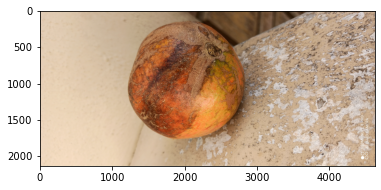

In [7]:
image1=Image.open(r'images/Original dataset/Test_350.jpg')
plt.imshow(image1)
plt.show()

# Prepare the Training Data

In [8]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', ' alternaria rot', ' aspergillus rot', 'botrytris fungus'], dtype='object')


In [9]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [10]:
train.tail()

,image_id,healthy,alternaria rot,aspergillus rot,botrytris fungus,label
396,Train_396,0,1,0,0,1
397,Train_397,0,1,0,0,1
398,Train_398,0,1,0,0,1
399,Train_399,0,1,0,0,1
400,Train_400,1,0,0,0,0


In [11]:
DIR

'images/Original dataset'

In [12]:
natsort.natsorted(os.listdir(DIR))

['.ipynb_checkpoints',
 'Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.j

In [13]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [14]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'images/train/alternaria_rot')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'images/train/aspergillus_rot')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'images/train/botrytris_fungus')
                
        elif search("Test",img):
            shutil.copy(path,r'images/test')
                

In [15]:
shutil.os.mkdir(r'images/train')
shutil.os.mkdir(r'images/train/healthy')
shutil.os.mkdir(r'images/train/alternaria_rot')
shutil.os.mkdir(r'images/train/aspergillus_rot')
shutil.os.mkdir(r'images/train/botrytris_fungus')
shutil.os.mkdir(r'images/test')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'images/train'

In [16]:
train_dir=create_train_data()

100%|██████████| 402/402 [01:16<00:00,  5.24it/s]


# Data Preprocessing

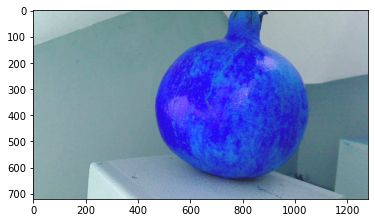

In [17]:
Train_DIR=r'images/train'
Categories=['healthy','alternaria_rot','aspergillus_rot','botrytris_fungus']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

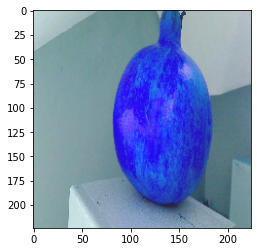

In [18]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Prepration

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D


In [20]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 325 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [21]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [22]:
checkpoint=ModelCheckpoint(r'models/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [23]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=5,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
20/20 [==============================] - ETA: 0s - loss: 1.3793 - accuracy: 0.2524
Epoch 00001: val_loss improved from inf to 1.31032, saving model to models\apple2.h5
20/20 [==============================] - 151s 8s/step - loss: 1.3793 - accuracy: 0.2524 - val_loss: 1.3103 - val_accuracy: 0.4844
Epoch 2/5
20/20 [==============================] - ETA: 0s - loss: 1.3054 - accuracy: 0.3495
Epoch 00002: val_loss improved from 1.31032 to 1.15549, saving model to models\apple2.h5
20/20 [==============================] - 126s 6s/step - loss: 1.3054 - accuracy: 0.3495 - val_loss: 1.1555 - val_accuracy: 0.5156
Epoch 3/5
20/20 [==============================] - ETA: 0s - loss: 1.1239 - accuracy: 0.4434
Epoch 00003: val_loss improved from 1.15549 to 1.12862, saving model to models\apple2.h5
20/20 [==============================] - 122s 6s/step - loss: 1.1239 - accuracy: 0.4434 - val_loss: 1.1286 - val_accuracy:

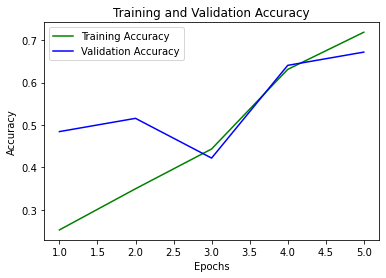

In [24]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,6)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

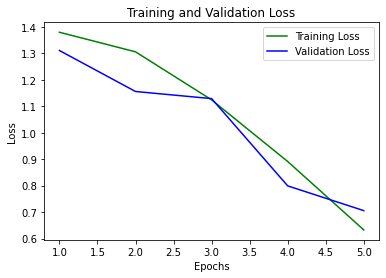

In [25]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,6)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the Prediction on a Single Image

2


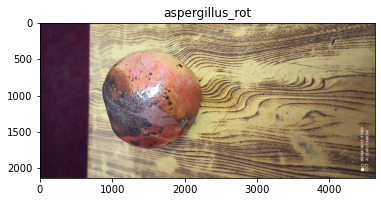

In [36]:
#test_image=r'images\train\rust\Train_3.jpg'
test_image=r'Test_496.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','alternaria_rot','aspergillus_rot','botrytris_fungus']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()